# Przetwarzanie wstępne. Filtracja kontekstowa.


### Cel:
- zapoznanie z pojęciem kontekstu / filtracji kontekstowej,
- zapoznanie z pojęciem konwolucji (splotu),
- zapoznanie z wybranymi filtrami:
	- filtry liniowe dolnoprzepustowe:
		- filtr uśredniający,
		- filtr Gaussa.
	- filtry nielinowe:
		- mediana,
		- mediana dla obrazów kolorowych.
	- filtry liniowe górnoprzepustowe:
			- laplasjan,
			- operator Robersta, Prewitta, Sobela.
- zadanie domowe: adaptacyjna filtracja medianowa.

### Filtry liniowe uśredniające (dolnoprzepustowe)

Jest to podstawowa rodzina filtrów stosowana w cyfrowym przetwarzaniu obrazów. 
Wykorzystuje się je w celu "rozmazania" obrazu i tym samym redukcji szumów (zakłóceń) na obrazie.
Filtr określony jest przez dwa parametry: rozmiar maski (ang. _kernel_) oraz wartości współczynników maski.

Warto zwrócić uwagę, że omawiane w niniejszym rozdziale operacje generują nową wartość piksela na podstawie pewnego fragmentu obrazu (tj. kontekstu), a nie jak operacje punktowe tylko na podstawie jednego piksela.


1. Wczytaj obraz _plansza.png_.
W dalszej części ćwiczenia sprawdzenie działania filtracji dla innych obrazów sprowadzi się do wczytania innego pliku.

2. Podstawowa funkcja to `cv2.filter2D`  - realizacja filtracji konwolucyjnej.
   Proszę sprawdzić jej dokumentację i zwrócić uwagę na obsługę problemu brzegowego (na krawędziach istnieją piksele dla których nie da się wyznaczyć otoczenia).

  Uwaga. Problem ten można też rozwiązać z użyciem funkcji `signal.convolve2d` z biblioteki _scipy_ (`from scipy import signal`).

3. Stwórz podstawowy filtr uśredniający o rozmiarze $3 \times 3$ -- za pomocą funkcji `np.ones`. Wykonaj konwolucję na wczytanym obrazie. Na wspólnym rysunku wyświetl obraz oryginalny, po filtracji oraz moduł z różnicy.

4. Przeanalizuj otrzymane wyniki. Jakie elementy zawiera obraz "moduł z różnicy"? Co na tej podstawie można powiedzieć o filtracji dolnoprzepustowej?

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/"

fileNames = ["jet.png", "kw.png", "moon.png", "lenaSzum.png", "lena.png", "plansza.png"]
for fileName in fileNames:
    if not os.path.exists(fileName):
        r = requests.get(url + fileName, allow_redirects=True)
        open(fileName, "wb").write(r.content)

In [2]:
plansza_img = cv2.imread("plansza.png", cv2.IMREAD_GRAYSCALE)

In [3]:
def show_filter(img, kernel, axs):
    axs[0].imshow(img, cmap="gray", vmin=0, vmax=255)
    axs[0].axis("off")
    axs[0].set_title("Original")

    filtered = cv2.filter2D(img, -1, kernel)

    axs[1].imshow(filtered, cmap="gray", vmin=0, vmax=255)
    axs[1].axis("off")
    axs[1].set_title("Filtered")

    axs[2].imshow(
        np.astype(
            np.abs(np.astype(img, np.int32) - np.astype(filtered, np.int32)), np.uint8
        ),
        cmap="gray",
    )
    axs[2].axis("off")
    axs[2].set_title("Difference")

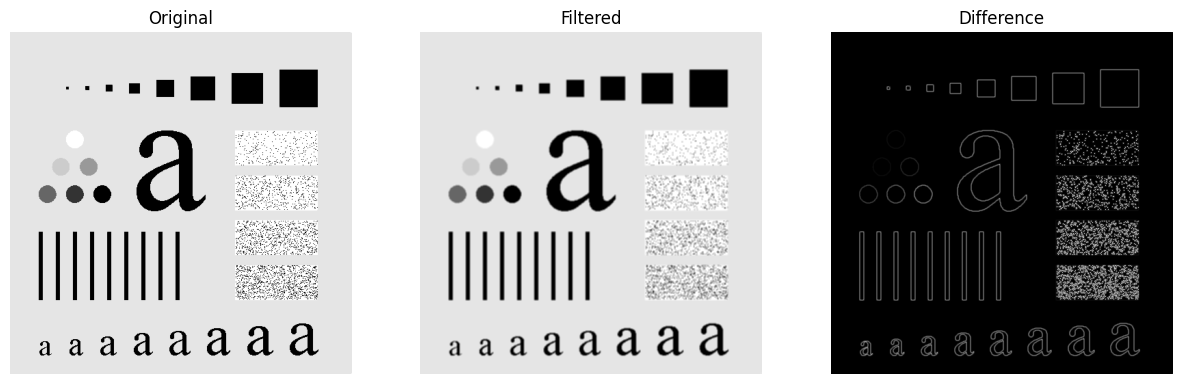

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

show_filter(plansza_img, np.ones((3, 3)) / 9, axs)

5. Na wspólnym rysunku wyświetl wyniki filtracji uśredniającej z oknem o rozmiarze 3, 5, 9, 15 i 35. 
Wykorzystaj polecenie `plt.subplot`. 
Przeanalizuj wpływ rozmiaru maski na wynik. 

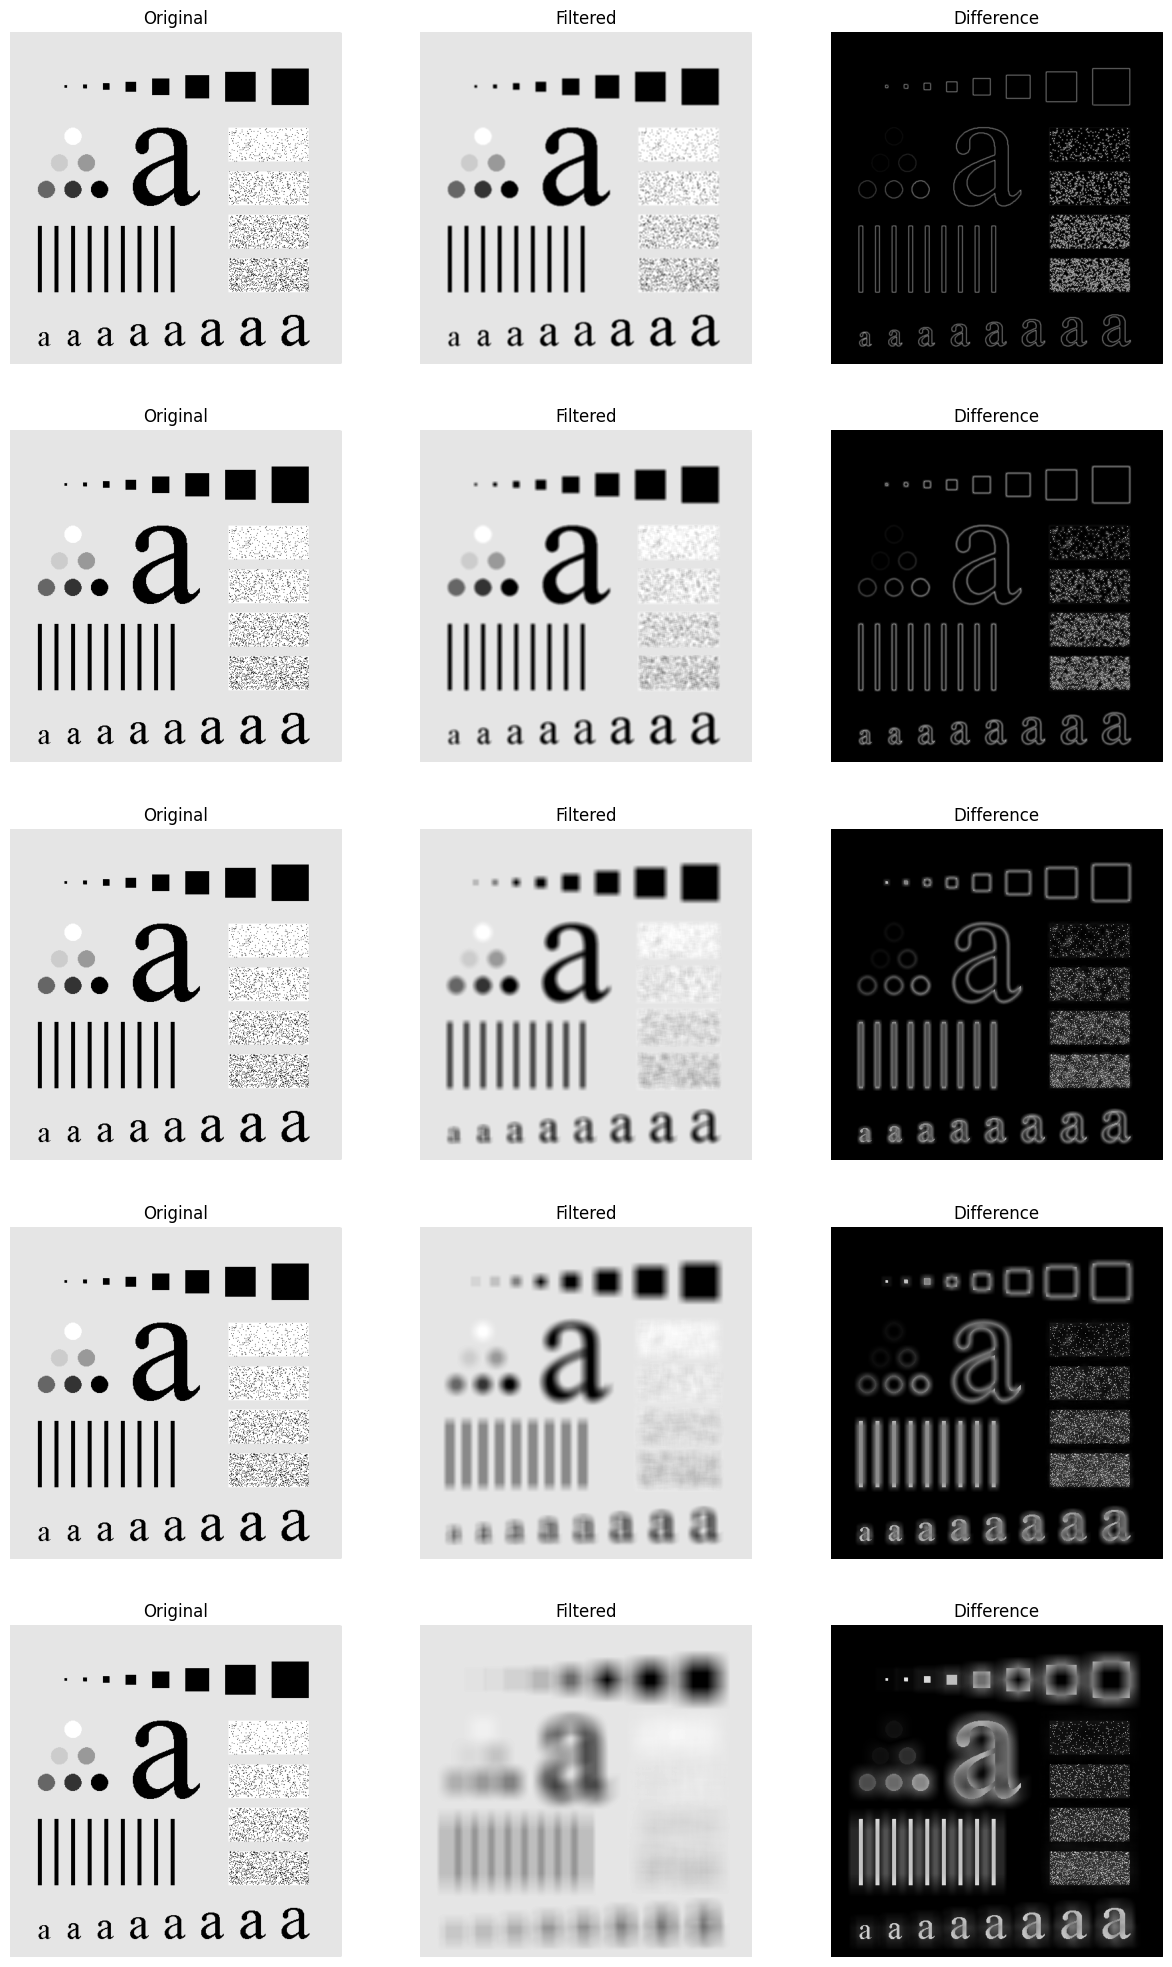

In [5]:
sizes = [3, 5, 9, 15, 35]

fig, axs = plt.subplots(len(sizes), 3, figsize=(15, len(sizes) * 5))
for i, size in enumerate(sizes):
    show_filter(plansza_img, np.ones((size, size)) / (size * size), axs[i])

6. Wczytaj obraz _lena.png_.
Zaobserwuj efekty filtracji dolnoprzepustowej dla obrazu rzeczywistego.

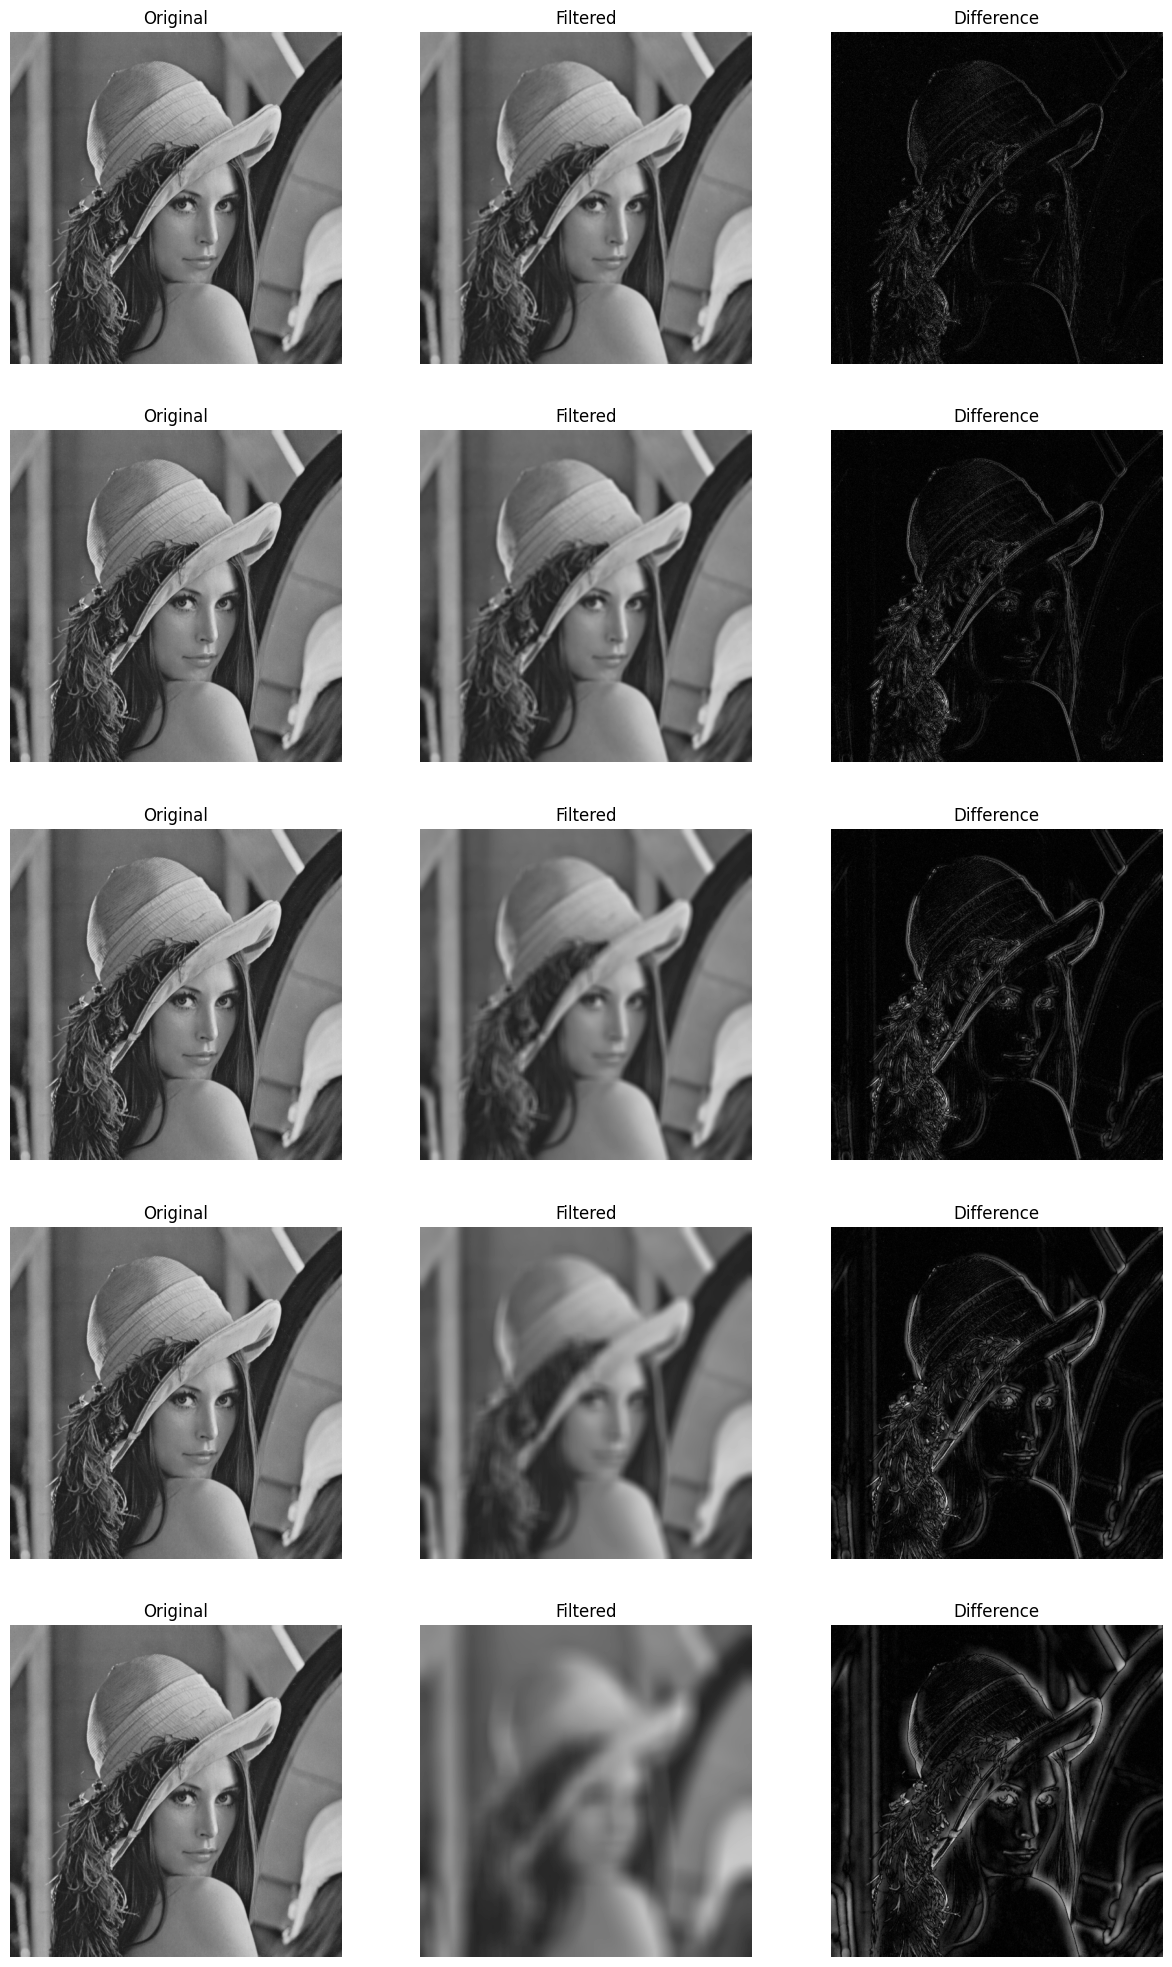

In [6]:
lena_img = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)

fig, axs = plt.subplots(len(sizes), 3, figsize=(15, len(sizes) * 5))
for i, size in enumerate(sizes):
    show_filter(lena_img, np.ones((size, size)) / (size * size), axs[i])

7. Niekorzystny efekt towarzyszący wykonanym filtracjom dolnoprzepustowym to utrata ostrości. 
Częściowo można go zniwelować poprzez odpowiedni dobór maski. 
Wykorzystaj maskę:  `M = np.array([1 2 1; 2 4 2; 1 2 1])`. 
Przed obliczeniami należy jeszcze wykonać normalizację - podzielić każdy element maski przez sumę wszystkich elementów: `M = M/sum(sum(M));`.
Tak przygotowaną maskę wykorzystaj w konwolucji - wyświetl wyniki tak jak wcześniej.
Możliwe jest też wykorzystywanie innych masek - współczynniki można dopasowywać do konkretnego problemu.

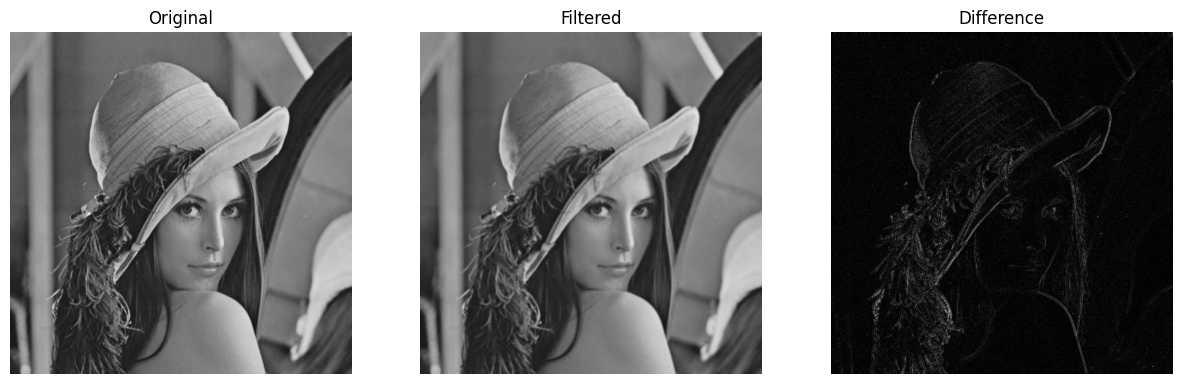

In [7]:
M = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
M = M / np.sum(M)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
show_filter(lena_img, M, axs)

8. Skuteczną i często wykorzystywaną maską jest tzw. maska Gasussa.
Jest to zbiór liczb, które aproksymują dwuwymiarowy rozkład Gaussa. 
Parametrem jest odchylenie standardowe i rozmiar maski.

9. Wykorzystując przygotowaną funkcję `fgaussian` stwórz maskę o rozmiarze $5 \times 5$ i odchyleniu standardowym 0.5.
  Wykorzystując funkcję `mesh` zwizualizuj filtr.
  Sprawdź jak parametr ``odchylenie standardowe'' wpływa na ``kształt'' filtru.

  Uwaga. W OpenCV dostępna jest *dedykowana* funkcja do filtracji Gaussa - `GaussianBlur`.
  Proszę na jednym przykładzie porównać jej działanie z użytym wyżej rozwiązaniem.

10. Wykonaj filtrację dla wybranych (2--3) wartości odchylenia standardowego.


In [8]:
def fgaussian(size, sigma):
    m = n = size
    h, k = m // 2, n // 2
    x, y = np.mgrid[-h : h + 1, -k : k + 1]
    g = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return g / g.sum()


def mesh(fun, size):
    fig = plt.figure()
    ax = plt.axes(projection="3d")

    X = np.arange(-size // 2, size // 2, 1)
    Y = np.arange(-size // 2, size // 2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun

    ax.plot_surface(X, Y, Z)

    plt.show()

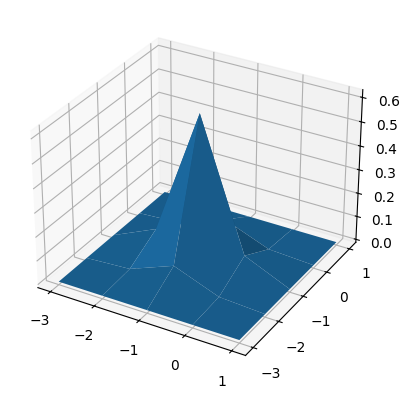

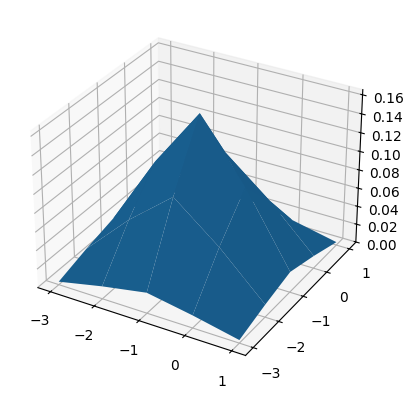

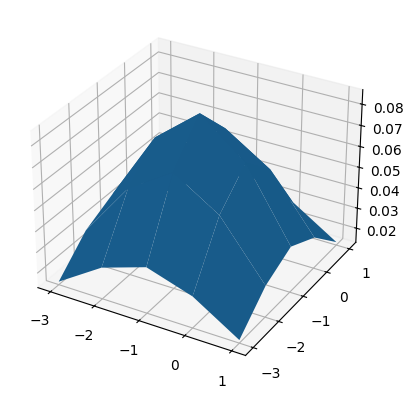

In [9]:
gauss_05 = fgaussian(5, 0.5)
gauss_10 = fgaussian(5, 1.0)
gauss_15 = fgaussian(5, 1.5)

mesh(gauss_05, 5)
mesh(gauss_10, 5)
mesh(gauss_15, 5)

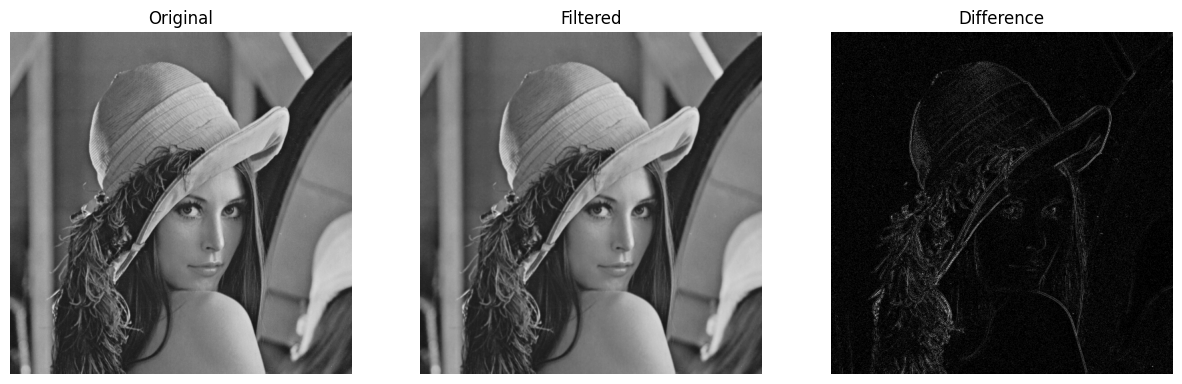

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
show_filter(lena_img, gauss_05, axs)

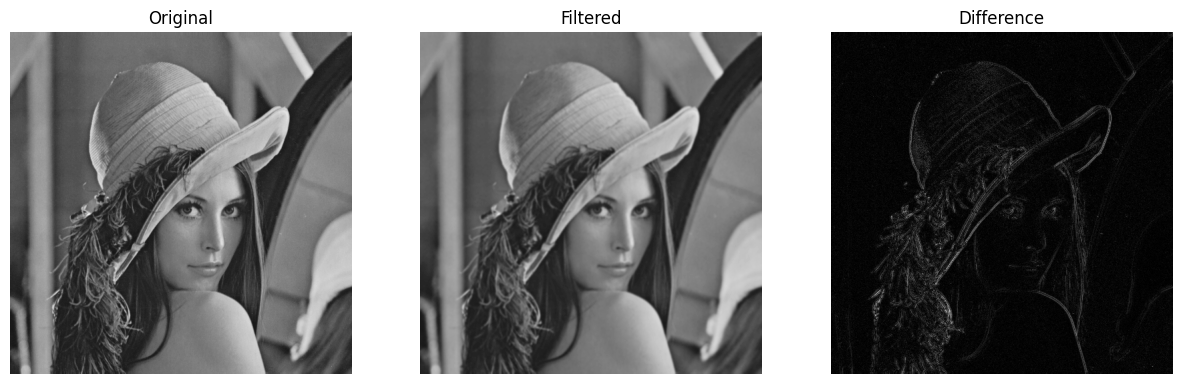

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
show_filter(lena_img, gauss_10, axs)

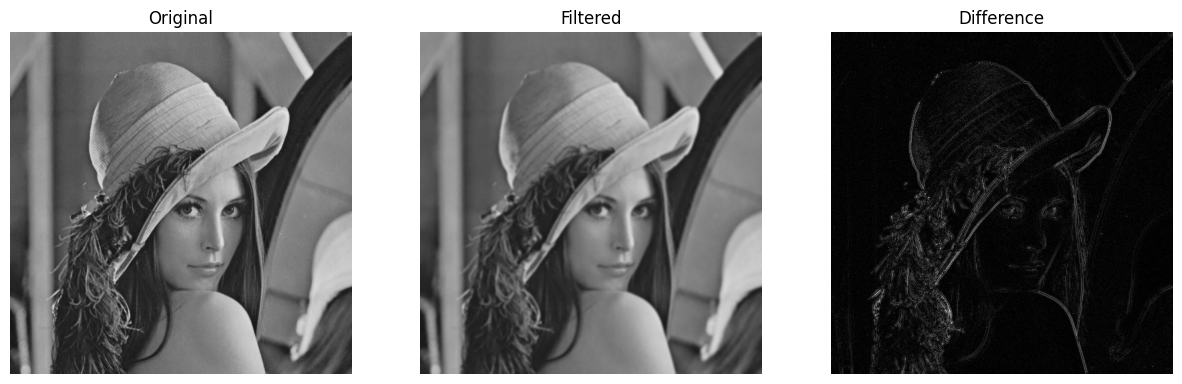

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
show_filter(lena_img, gauss_15, axs)

Text(0.5, 1.0, 'Difference')

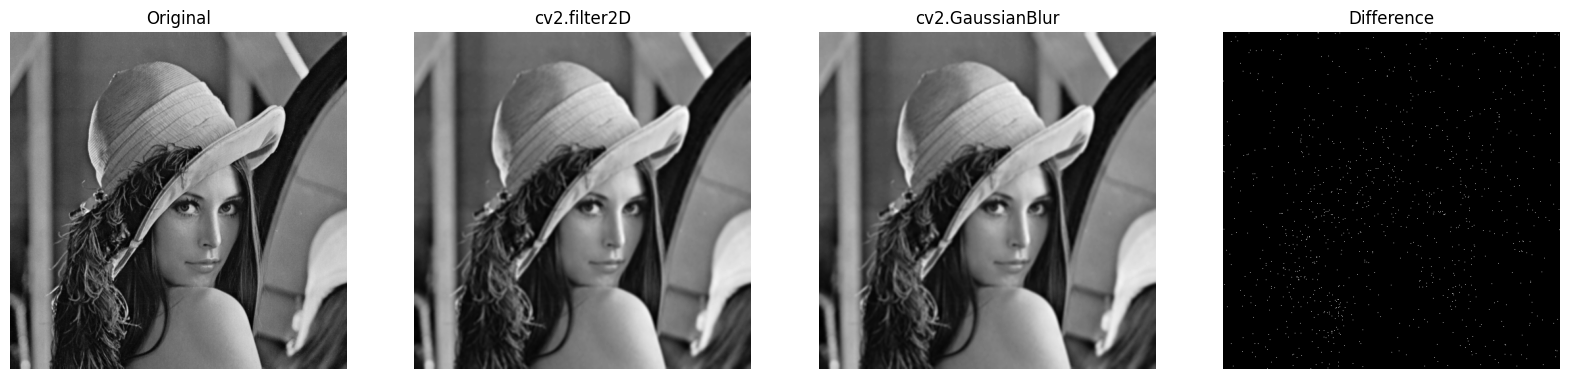

In [13]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(lena_img, "gray")
axs[0].axis("off")
axs[0].set_title("Original")

cvfilter = cv2.filter2D(lena_img, -1, fgaussian(5, 2.0))
cvblur = cv2.GaussianBlur(lena_img, (5, 5), 2.0)

axs[1].imshow(cvfilter, "gray")
axs[1].axis("off")
axs[1].set_title("cv2.filter2D")

axs[2].imshow(cvblur, "gray")
axs[2].axis("off")
axs[2].set_title("cv2.GaussianBlur")

axs[3].imshow(
    np.astype(
        np.abs(np.astype(cvfilter, np.int32) - np.astype(cvblur, np.int32)), np.uint8
    ),
    "gray",
)
axs[3].axis("off")
axs[3].set_title("Difference")

### Filtry nieliniowe -- mediana

Filtry rozmywające redukują szum, ale niekorzystnie wpływają na ostrość obrazu.
Dlatego często wykorzystuje się filtry nieliniowe - np. filtr medianowy (dla przypomnienia: mediana - środkowa wartość w posortowanym ciągu liczb).

Podstawowa różnica pomiędzy filtrami liniowymi, a nieliniowymi polega na tym, że przy filtracji liniowej na nową wartość piksela ma wpływ wartość wszystkich pikseli z otoczenia (np. uśrednianie, czasem ważone), natomiast w przypadku filtracji nieliniowej jako nowy piksel wybierana jest któraś z wartości otoczenia - według jakiegoś wskaźnika (wartość największa, najmniejsza czy właśnie mediana).


1. Wczytaj obraz _lenaSzum.png_ (losowe 10% pikseli białych lub czarnych - tzw. zakłócenia impulsowe). Przeprowadź filtrację uśredniającą z rozmiarem maski 3x3. Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Wykorzystując funkcję ``cv2.medianBlur` wykonaj filtrację medianową _lenaSzum.png_ (z rozmiarem maski $3 \times 3$). Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Która filtracja lepiej radzi sobie z tego typu szumem?

  Uwaga. Taki sam efekt da również użycie funkcji `signal.medfilt2d`.


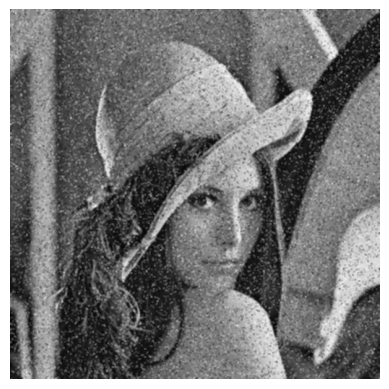

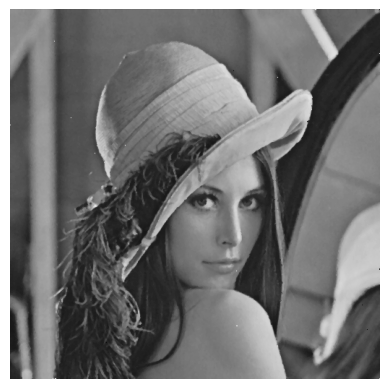

In [14]:
lenaszum_img = cv2.imread("lenaSzum.png", cv2.IMREAD_GRAYSCALE)

avg_filter_noise = cv2.filter2D(lenaszum_img, -1, np.ones((3, 3)) / 9)
median_filter_noise = cv2.medianBlur(lenaszum_img, 3)

plt.imshow(avg_filter_noise, "gray")
plt.axis("off")
plt.show()

plt.imshow(median_filter_noise, "gray")
plt.axis("off")
plt.show()

2. Przeprowadź filtrację uśredniającą, a następnie medianową obrazu _lena.png_.
   Wyniki porównaj - dla obu wyświetl: oryginał, wynik filtracji i moduł z różnicy.
   Szczególną uwagę zwróć na ostrość i krawędzie.
   W której filtracji krawędzie zostają lepiej zachowane?

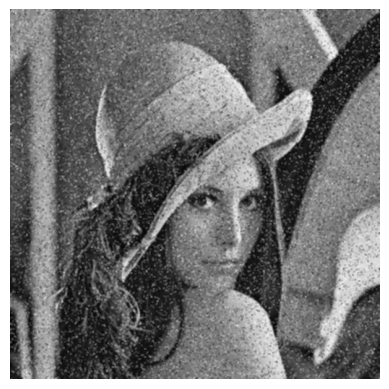

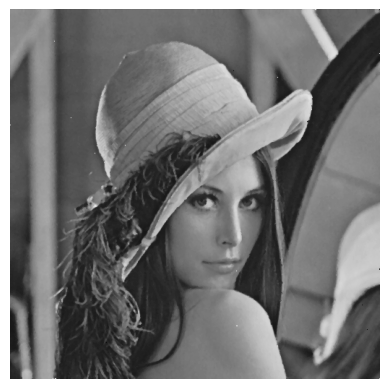

In [15]:
avg_filter_lena = cv2.filter2D(lenaszum_img, -1, np.ones((3, 3)) / 9)
median_filter_lena = cv2.medianBlur(lenaszum_img, 3)

plt.imshow(avg_filter_lena, "gray")
plt.axis("off")
plt.show()

plt.imshow(median_filter_lena, "gray")
plt.axis("off")
plt.show()

3. Ciekawy efekt można uzyskać wykonując filtrację medianową wielokrotnie. Określa się go mianem  posteryzacji.  W wyniku przetwarzania z obrazka usunięte zostają detale, a duże obszary uzyskują tą samą wartość jasności.  Wykonaj operację mediany $5 \times 5$ na obrazie _lena.png_ 10-krotnie. (wykorzystaj np. pętlę `for`).


Inne filtry nieliniowe:
- filtr modowy - moda (dominanta) zamiast mediany,
- filtr olimpijski - średnia z podzbioru otoczenia (bez wartości ekstremalnych),
- hybrydowy filtr medianowy - mediana obliczana osobno w różnych podzbiorach otoczenia (np. kształt ``x'',``+''), a jako wynik brana jest mediana ze zbioru wartość elementu centralnego, mediana z ``x'' i mediana z ``+'',
- filtr minimalny i maksymalny (będą omówione przy okazji operacji morfologicznych w dalszej części kursu).


Warto zdawać sobie sprawę, z szerokich możliwości dopasowywania rodzaju filtracji do konkretnego rozważanego problemu i rodzaju zaszumienia występującego na obrazie.

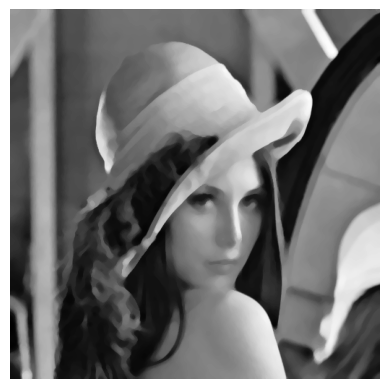

In [16]:
lena_poster_img = lena_img

for _ in range(10):
    lena_poster_img = cv2.medianBlur(lena_poster_img, 5)

plt.imshow(lena_poster_img, "gray")
plt.axis("off")
plt.show()

## Filtry liniowe górnoprzepustowe (wyostrzające, wykrywające krawędzie)

Zadaniem filtrów górnoprzepustowych jest wydobywanie z obrazu składników odpowiedzialnych za szybkie zmiany jasności - konturów, krawędzi, drobnych elementów tekstury.

### Laplasjan (wykorzystanie drugiej pochodnej obrazu)

1. Wczytaj obraz _moon.png_.

2. Wprowadź podstawową maskę laplasjanu:
\begin{equation}
M = 
\begin{bmatrix}
0 & 1& 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0
\end{bmatrix}
\end{equation}

3. Przed rozpoczęciem obliczeń należy dokonać normalizacji maski - dla rozmiaru $3 \times 3$ podzielić każdy element przez 9.
   Proszę zwrócić uwagę, że nie można tu zastosować takiej samej normalizacji, jak dla filtrów dolnoprzepustowanych, gdyż skutkowałby to dzieleniem przez 0.

4. Wykonaj konwolucję obrazu z maską (`c2.filter2D`). Przed wyświetleniem, wynikowy obraz należy poddać normalizacji (występują ujemne wartości). Najczęściej wykonuje się jedną z dwóch operacji:
- skalowanie (np. poprzez dodatnie 128 do każdego z pikseli),
- moduł (wartość bezwzględna).

Wykonaj obie normalizacje. 
Na wspólnym wykresie wyświetl obraz oryginalny oraz przefiltrowany po obu normalizacjach. 

In [17]:
moon_img = cv2.imread("moon.png", cv2.IMREAD_GRAYSCALE)

In [18]:
M = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float64)
M = M / 9

moon_laplasjan = cv2.filter2D(np.astype(moon_img, np.float64), -1, M)

moon_laplasjan_norm_scale = np.astype(moon_laplasjan + 128, np.uint8)
moon_laplasjan_norm_abs = np.astype(np.fabs(moon_laplasjan), np.uint8)

(np.float64(-0.5), np.float64(465.5), np.float64(539.5), np.float64(-0.5))

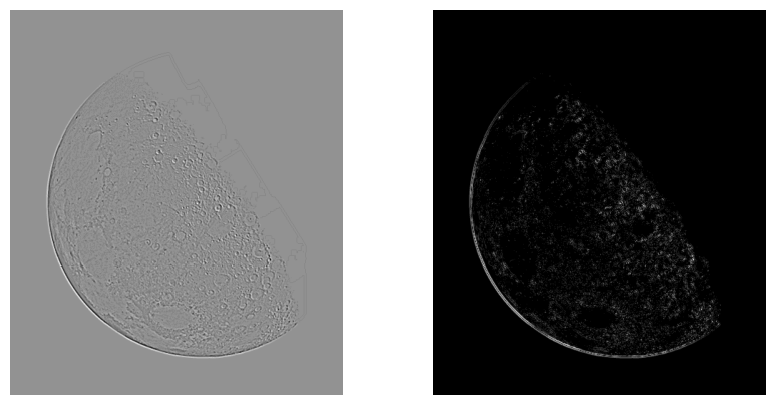

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(moon_laplasjan_norm_scale, "gray")
axs[0].axis("off")

axs[1].imshow(moon_laplasjan_norm_abs, "gray")
axs[1].axis("off")

7. Efekt wyostrzenia uzyskuje się po odjęciu/dodaniu (zależy do maski) rezultatu filtracji laplasjanowej i oryginalnego obrazu. Wyświetl na jednym wykresie: obraz oryginalny, sumę oryginału i wyniku filtracji oraz różnicę (bezwzględną) oryginału i wyniku filtracji.
 Uwaga. Aby uniknąć artefaktów, należy obraz wejściowy przekonwertować do formatu ze znakiem.



(np.float64(-0.5), np.float64(465.5), np.float64(539.5), np.float64(-0.5))

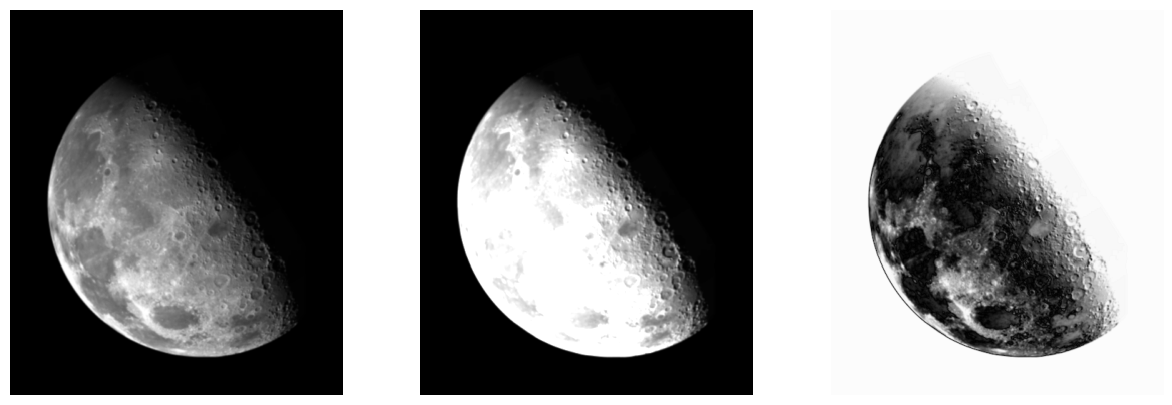

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(moon_img, "gray")
axs[0].axis("off")

axs[1].imshow(
    np.astype(
        np.clip(
            np.astype(moon_img, np.int32)
            + np.astype(moon_laplasjan_norm_scale, np.int32),
            0,
            255,
        ),
        np.uint8,
    ),
    "gray",
)
axs[1].axis("off")

axs[2].imshow(
    np.astype(
        np.abs(
            np.astype(moon_img, np.int32)
            - np.astype(moon_laplasjan_norm_scale, np.int32)
        ),
        np.uint8,
    ),
    "gray",
)
axs[2].axis("off")

(np.float64(-0.5), np.float64(465.5), np.float64(539.5), np.float64(-0.5))

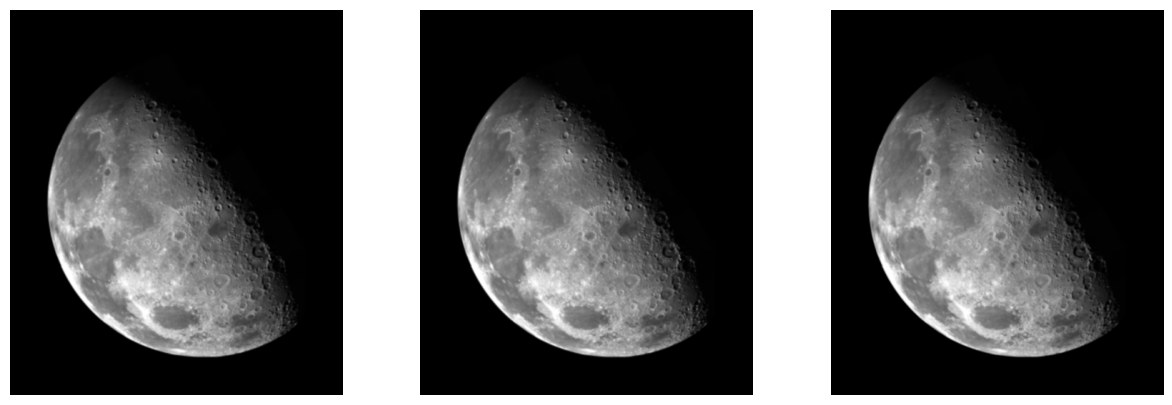

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(moon_img, "gray")
axs[0].axis("off")

axs[1].imshow(
    np.astype(
        np.clip(
            np.astype(moon_img, np.int32)
            + np.astype(moon_laplasjan_norm_abs, np.int32),
            0,
            255,
        ),
        np.uint8,
    ),
    "gray",
)
axs[1].axis("off")

axs[2].imshow(
    np.astype(
        np.abs(
            np.astype(moon_img, np.int32) - np.astype(moon_laplasjan_norm_abs, np.int32)
        ),
        np.uint8,
    ),
    "gray",
)
axs[2].axis("off")

### Gradienty (wykorzystanie pierwszej pochodnej obrazu)

1. Wczytaj obraz _kw.png_. Stwórz odpowiednie maski opisane w kolejnych punktach i dokonaj filtracji.
2. Wykorzystując gradient Robertsa przeprowadź detekcję krawędzi - poprzez wykonanie konwolucji obrazu z daną maską:
\begin{equation}
R1 = \begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}   
R2 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix}
\end{equation}

Wykorzystaj stworzony wcześniej kod (przy laplasjanie) - dwie metody normalizacji oraz sposób wyświetlania.

3. Analogicznie przeprowadź detekcję krawędzi za pomocą gradientu Prewitta (pionowy i poziomy)
\begin{equation}
P1 = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}   
P2 = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation}

4. Podobnie skonstruowany jest gradient Sobela (występuje osiem masek, zaprezentowane są dwie ``prostopadłe''):
\begin{equation}
S1 = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}   
S2 = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
\end{equation}

Przeprowadź detekcję krawędzi za pomocą gradientu Sobela. 

In [22]:
kw_img = cv2.imread("kw.png", cv2.IMREAD_GRAYSCALE)

In [23]:
R1 = np.array([[0, 0, 0], [-1, 0, 0], [0, 1, 0]])

R2 = np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]])

In [24]:
P1 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

P2 = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

In [25]:
S1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

S2 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

In [26]:
def plot_filter_norms(img, kernel):
    filtered = cv2.filter2D(np.astype(img, np.float32), -1, kernel)
    filtered_norm_scale = np.astype(filtered + 128, np.uint8)
    filtered_norm_abs = np.astype(np.fabs(filtered), np.uint8)

    fig, axs = plt.subplots(1, 3, figsize=(15, 15))

    axs[0].imshow(img, "gray")
    axs[0].axis("off")
    axs[0].set_title("Original")

    axs[1].imshow(filtered_norm_scale, "gray")
    axs[1].axis("off")
    axs[1].set_title("Filtered norm scale")

    axs[2].imshow(filtered_norm_abs, "gray")
    axs[2].axis("off")
    axs[2].set_title("Filtered norm abs")

    plt.tight_layout()
    plt.show()

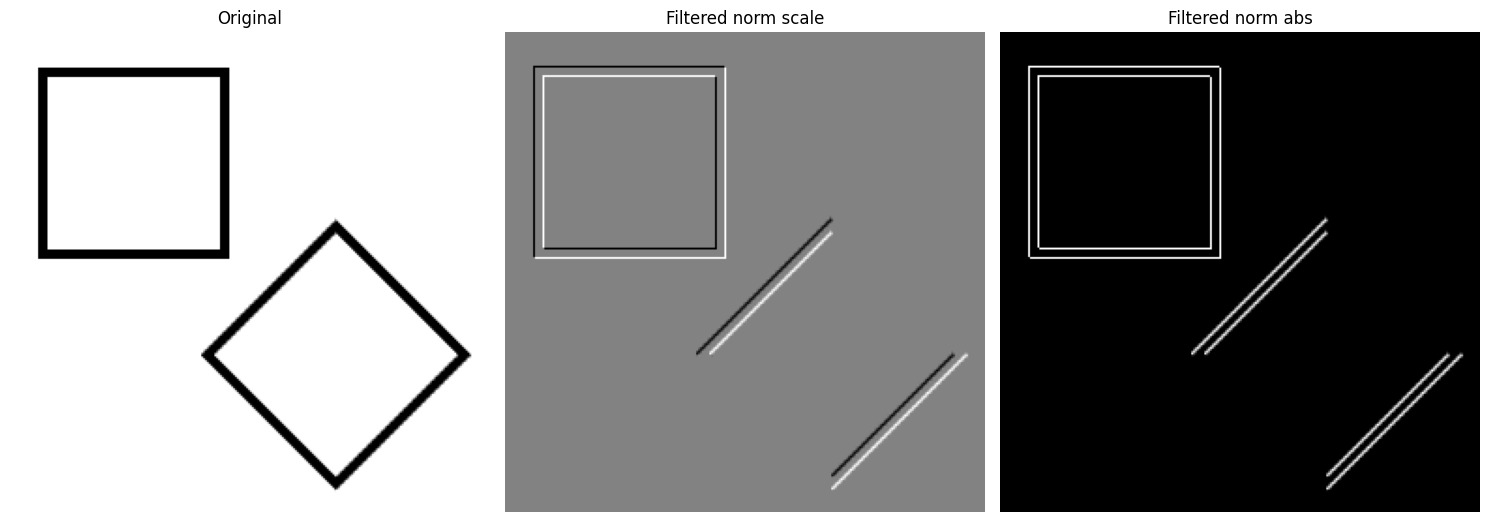

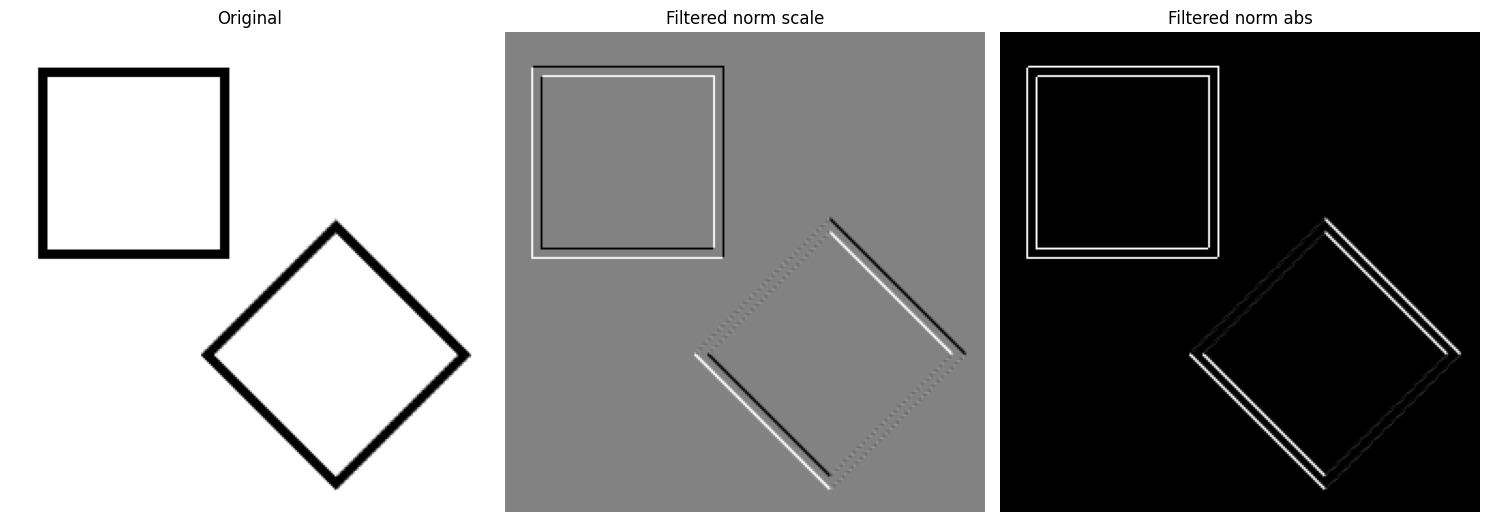

In [27]:
plot_filter_norms(kw_img, R1 / 9)
plot_filter_norms(kw_img, R2 / 9)

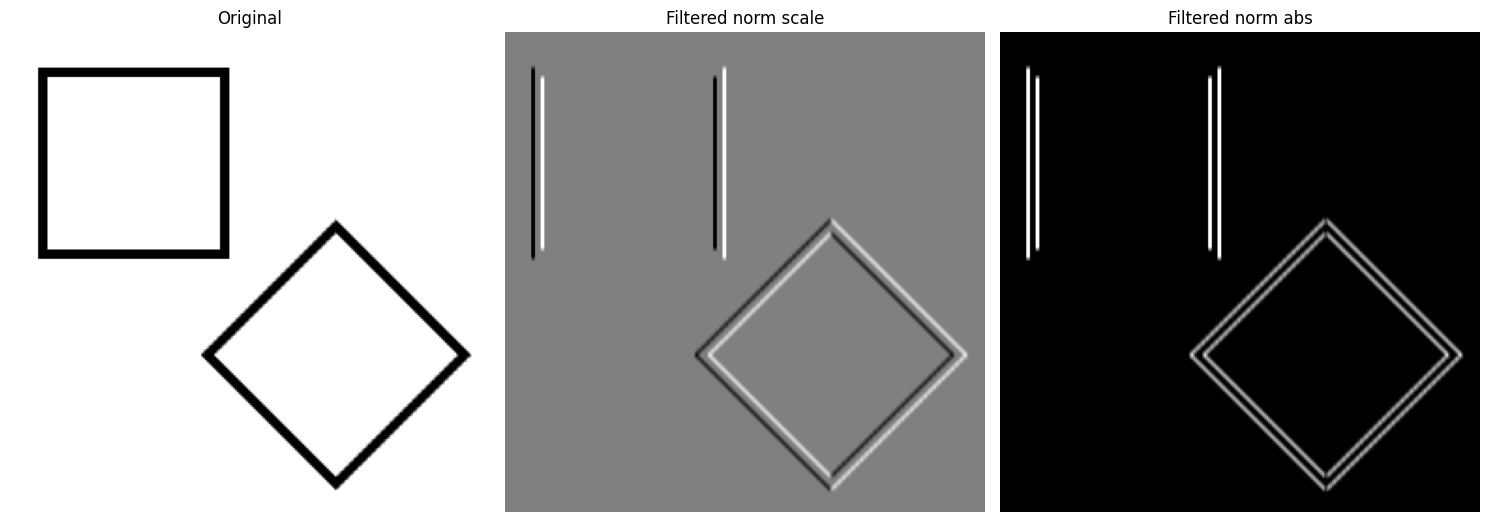

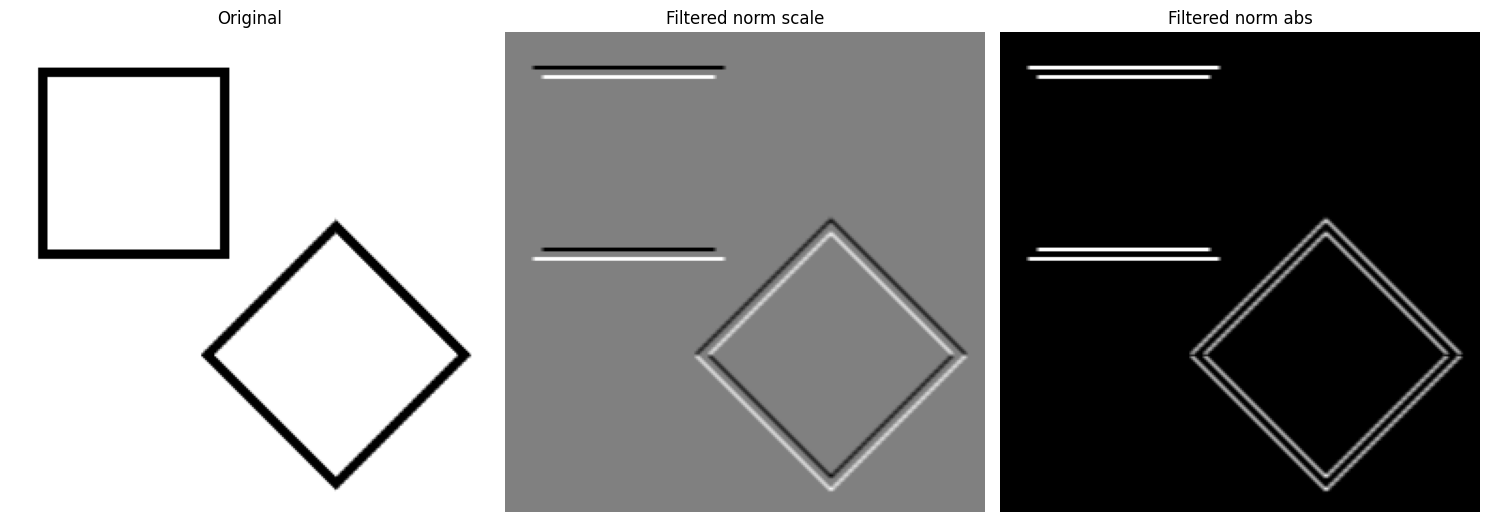

In [28]:
plot_filter_norms(kw_img, P1 / 9)
plot_filter_norms(kw_img, P2 / 9)

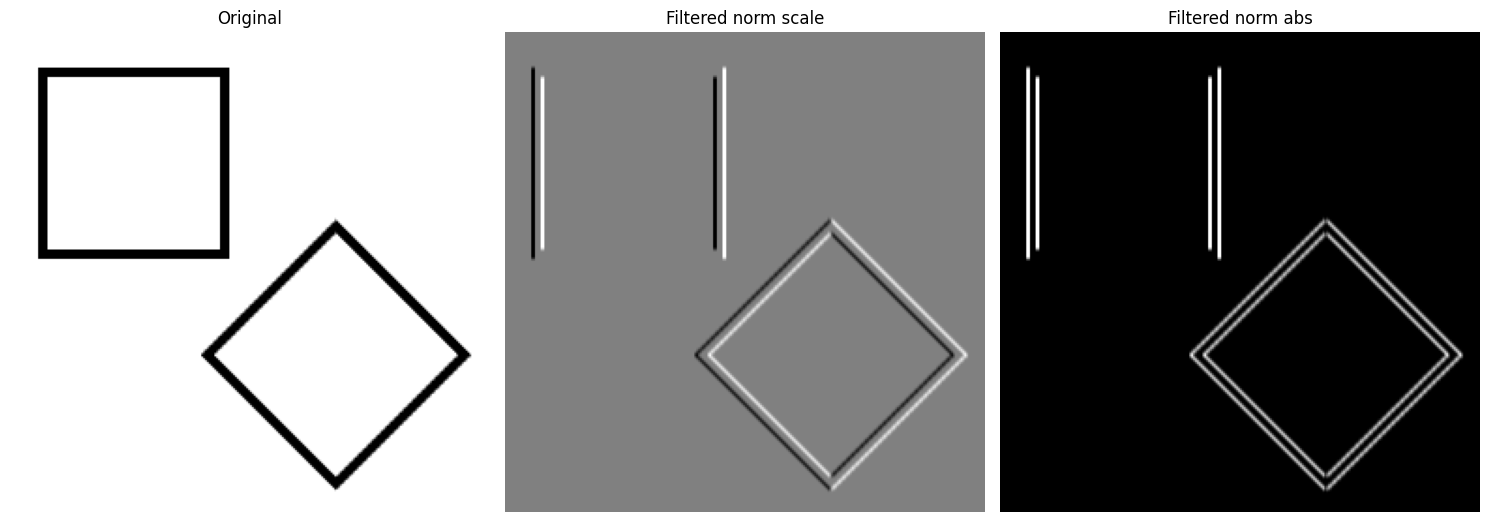

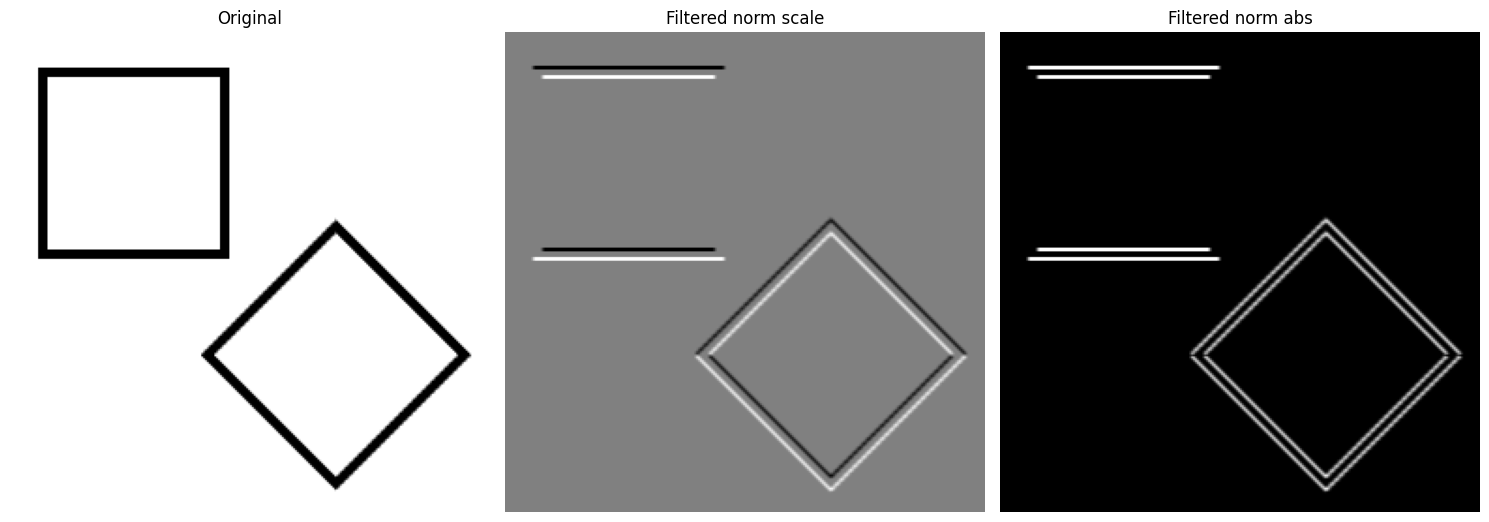

In [29]:
plot_filter_norms(kw_img, S1 / 9)
plot_filter_norms(kw_img, S2 / 9)

5. Na podstawie dwóch ortogonalnych masek np. Sobela można stworzyć tzw. filtr kombinowany - pierwiastek kwadratowy z sumy kwadratów gradientów:
\begin{equation}
OW = \sqrt{(O * S1)^2 + (O * S2)^2}
\end{equation}
gdzie:  $OW$ - obraz wyjściowy, $O$ - obraz oryginalny (wejściowy), $S1,S2$ - maski Sobela, $*$ - operacja konwolucji.

Zaimplementuj filtr kombinowany.

Uwaga. Proszę zwrócić uwagę na konieczność zmiany formatu danych obrazu wejściowego - na typ znakiem



In [30]:
kw_img_fp32 = np.astype(kw_img, np.float32)
OS1 = cv2.filter2D(kw_img_fp32, -1, S1)
OS2 = cv2.filter2D(kw_img_fp32, -1, S2)

OW = np.sqrt(np.power(OS1, 2) + np.power(OS2, 2))

Text(0.5, 1.0, 'Combined squares')

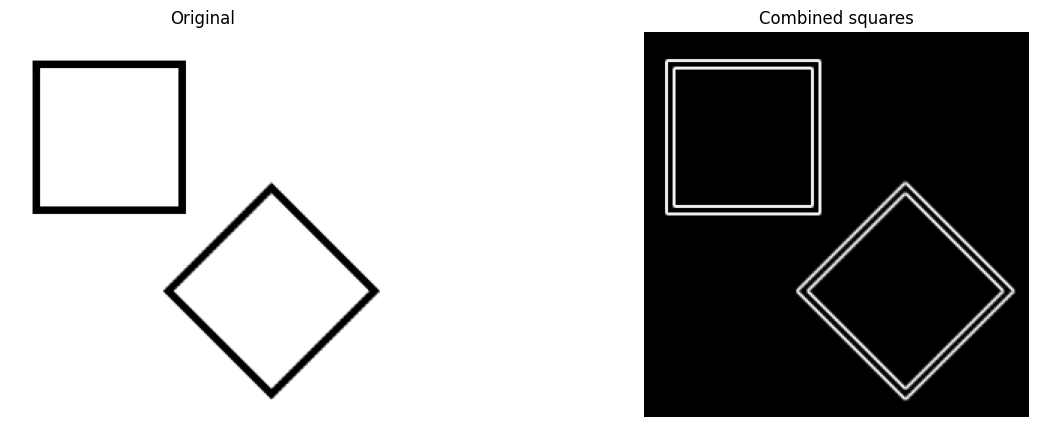

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(kw_img, "gray")
axs[0].axis("off")
axs[0].set_title("Original")

axs[1].imshow(OW, "gray")
axs[1].axis("off")
axs[1].set_title("Combined squares")

6. Istnieje alternatywna wersja filtra kombinowanego, która zamiast pierwiastka z sumy kwadratów wykorzystuje sumę modułów (prostsze obliczenia). 
Zaimplementuj tę wersję. 

In [32]:
kw_img_fp32 = np.astype(kw_img, np.float32)
OS1 = cv2.filter2D(kw_img_fp32, -1, S1)
OS2 = cv2.filter2D(kw_img_fp32, -1, S2)

OW = np.abs(OS1) + np.abs(OS2)

Text(0.5, 1.0, 'Combined abs')

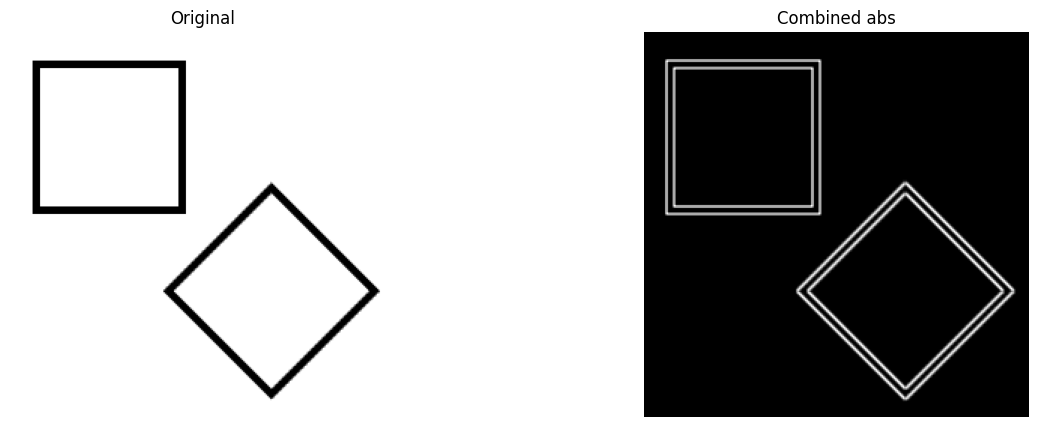

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(kw_img, "gray")
axs[0].axis("off")
axs[0].set_title("Original")

axs[1].imshow(OW, "gray")
axs[1].axis("off")
axs[1].set_title("Combined abs")

7. Wczytaj plik _jet.png_ (zamiast _kw.png_).
Sprawdź działanie obu wariantów filtracji kombinowanej.

In [34]:
jet_img = cv2.imread("jet.png", cv2.IMREAD_GRAYSCALE)

In [35]:
jet_img_fp32 = np.astype(jet_img, np.float32)
OS1 = cv2.filter2D(jet_img_fp32, -1, S1)
OS2 = cv2.filter2D(jet_img_fp32, -1, S2)

OW_squares = np.sqrt(np.power(OS1, 2) + np.power(OS2, 2))
OW_abs = np.abs(OS1) + np.abs(OS2)

Text(0.5, 1.0, 'Combined abs')

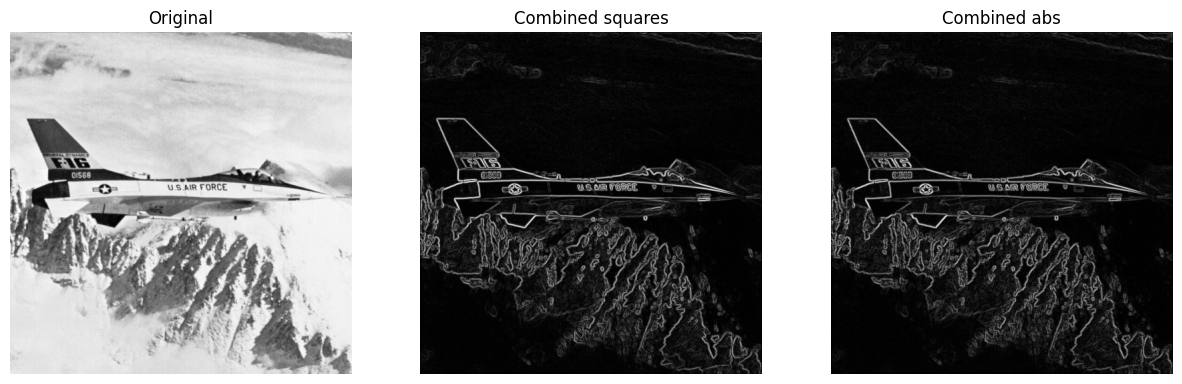

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(jet_img, "gray")
axs[0].axis("off")
axs[0].set_title("Original")

axs[1].imshow(OW_squares, "gray")
axs[1].axis("off")
axs[1].set_title("Combined squares")

axs[2].imshow(OW_abs, "gray")
axs[2].axis("off")
axs[2].set_title("Combined abs")